In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Shivshakti Media\Downloads\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# how many rows and columns are there ?
df.shape

(13320, 9)

There is a 13220 rows and 9 columns. Now, Let's Check for missing values

In [4]:
# Check the missing values
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

We can see here. there is a 1 Missing values in location, Size has 16 missing values, Balcony has 609 Missing values, Society and balcony has too many Missing values so we are going to delete that Columns.

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


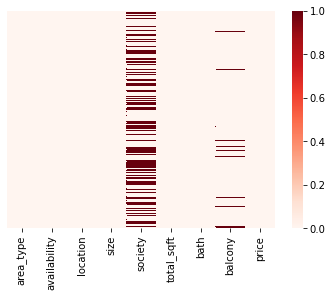

In [6]:
# Visualize the missing values Using heat map
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False,cmap='Reds')
plt.show()

In [7]:
def is_float(text):
    try:
        float(text)
    except:
        return False
    return True

df[~(df['total_sqft']).apply(is_float)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [8]:
df.shape

(13320, 9)

# Handle Missing Values

### Handle the Missing value for Location Column

<AxesSubplot:>

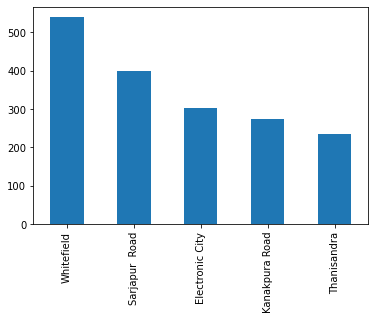

In [9]:
# First of all we will see that which location is most repeated in Dataset

# Method 1:
df['location'].value_counts()[:5].plot.bar()

# Method 2:
    # df['location'][df['location'] == df['location'].value_counts()[:5].index]
    # df2 = (df.groupby(['location'])['location'].count())
    # df2.sort_values(ascending=False)[:5].plot.bar()

there is only one missing value in location and we can see by this bar chart that Whitefield location is almost near 550 times so we can replace that null value to Whitefield value because it will not affect too much on the model.

In [10]:
# replace null value to 'WhiteField value'
df['location'] = df['location'].replace(np.NaN,'Whitefield')

# for lower case of the location
df['location'] = df['location'].apply(lambda x:x.lower())

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Handle the Missing value for size Column

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

first of all we will fill the null values of the size column and after that We can make new column BHK using this feature because here we have to do some formatting of the data

<AxesSubplot:>

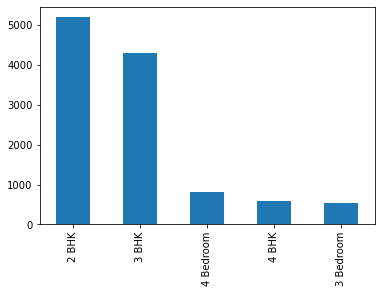

In [13]:
# observing the most repeated values of the data
df['size'].value_counts()[:5].plot.bar()

We have total 16 null values in this column and we can see in this chart that 2 BHK is most repeated value in this column so we can fill null values with the 2 BHK.

In [14]:
# fuction for BHK Formatting and Fill Null Values to 2.
def bhk_feature(bhk):
    if pd.isnull(bhk) == False:
        bhk_value = str(bhk).split()[0]
        return int(bhk_value)
    else:
        return 2

In [15]:
# call function for size and formatting and derived new column BHK. 
df['BHK'] = df['size'].apply(bhk_feature)

In [16]:
# Check null values
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
BHK                0
dtype: int64

### Handle the Missing value for bath Column

In [17]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

##### We can fill Bath null values based on the BHK. like we can take mean of bath for our existing BHK values and we can see that how many bath should be in the House if our House is 2 Bhk or 3 Bhk like that. 

In [18]:
# mean of the bath based on the BHK
df2 = df.copy()
df2.head()
df2.dropna(inplace=True)
df2.groupby('BHK')['bath'].mean()

BHK
1     1.033058
2     1.984826
3     2.781360
4     4.351852
5     5.160000
6     6.333333
7     5.000000
9     9.000000
11    9.000000
Name: bath, dtype: float64

<AxesSubplot:xlabel='BHK', ylabel='bath'>

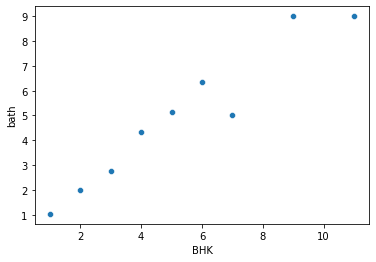

In [19]:
# Checking the Linear Realtionship Between BHK and Bath
bath_bhk_relation = pd.DataFrame(df2.groupby('BHK')['bath'].mean())
bath_bhk_relation = bath_bhk_relation.reset_index()
sns.scatterplot(x = 'BHK',y = 'bath',data=bath_bhk_relation)

In [20]:
# Function for Filling null values of bath based on the BHK

def fill_bath_nullvalues(bath_bhk):
    bath = bath_bhk[0]
    bhk = bath_bhk[1]
    if pd.isnull(bath) == True:
        return int(bhk)
    else:
        return int(bath)

In [21]:
# Call function for fill null values of bath 

df['bath'] = df[['bath','BHK']].apply(fill_bath_nullvalues,axis=1)

In [22]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
735,Super built-up Area,17-Oct,ramagondanahalli,2 BHK,ViistLa,1235,2,1.0,52.04,2
4221,Super built-up Area,Ready To Move,jakkur,3 BHK,BrdgeNo,1760,3,2.0,110.00,3
747,Plot Area,Ready To Move,chelekare,1 Bedroom,NaN,600,1,1.0,60.00,1
3406,Super built-up Area,18-Apr,kothannur,3 BHK,NaN,1270,3,2.0,45.00,3
10738,Super built-up Area,18-Jun,jp nagar,2 BHK,NaN,1060,2,2.0,33.95,2


In [23]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath               0
balcony          609
price              0
BHK                0
dtype: int64

In [24]:
df.shape

(13320, 10)

### Handle the values for Square feet columns

Total Square feet has some values in range format. so we have to handle that values also. we can take a mean of that range and fill that values with that mean.

In [25]:
# for reset index
df.reset_index(drop=True,inplace=True)

# for fetch the index of acres values in sqft columns
drop_index = []
for i in range(1,int(len(df['total_sqft']))):
    if 'Acres' in df.loc[i,'total_sqft'] or 'Grounds' in df.loc[i,'total_sqft'] or 'Perch' in df.loc[i,'total_sqft']:
        drop_index.append(i)
        
# for fetch the index of cents values in sqft columns
for i in range(1,int(len(df['total_sqft']))):
    if 'Cents' in df.loc[i,'total_sqft'] or 'Guntha' in df.loc[i,'total_sqft']:
        drop_index.append(i)
        
# Now we are going to delete that acres values from the column
df.drop(drop_index,inplace=True)
             

def impute_sqft(text):
    if '-' in text:
        avg = float(text.split('-')[0].strip()) + float(text.split('-')[1].strip()) / 2
        return float(avg)
    elif 'Sq' in text:
        return float(text.split('Sq')[0].strip())
    else:
        return float(text)
        
df['total_sqft'] = df['total_sqft'].apply(impute_sqft)

# for reset index
df.reset_index(drop=True,inplace=True)

### Now we are going to delete our useless columns like Society (Very High number of missing values), Size, area_type, Availability, balcony 

In [26]:
# for drop columns
df.drop(['area_type','availability','size','society','balcony'],axis=1,inplace=True)

Now we have our clean and Final dataset on which we can perform EDA and Make Model. 

# Create New Feature Price Per Square Feet

In [27]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

In [28]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,electronic city phase ii,1056.0,2,39.07,2,3699.810606
1,chikka tirupathi,2600.0,5,120.00,4,4615.384615
2,uttarahalli,1440.0,2,62.00,3,4305.555556
3,lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,kothanur,1200.0,2,51.00,2,4250.000000


We are going to make this 250 columns using one hot encoding and other values will be one single common column.

#### Encoding of the Location Columns

In [29]:
# Method 1:
# counts = df['location'].value_counts()
# threshold = 100
# repl = counts[counts <= 100].index

# Method 2:
location_stats = df['location'].value_counts()
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10
# location_dummies = pd.get_dummies(df['location'].replace(repl,'uncommon'),drop_first=True)

nagappa reddy layout    10
btm 1st stage           10
naganathapura           10
gunjur palya            10
ganga nagar             10
                        ..
maruthi extension        1
whietfield,              1
iggalur                  1
t.c. palya               1
vikram nagar             1
Name: location, Length: 1050, dtype: int64

In [30]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df.sample(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
9158,kundalahalli,1047.00,2,72.00,2,6876.790831
85,hegde nagar,3000.00,7,210.00,6,7000.000000
3012,electronics city phase 1,1595.00,3,75.00,3,4702.194357
9576,hoodi,1559.00,3,81.55,3,5230.917255
12902,sarjapur road,1309.00,2,69.50,2,5309.396486
10707,kanakpura road,1419.59,2,65.00,3,4578.786833
7905,other,927.00,2,50.00,2,5393.743258
11084,other,4395.00,3,240.00,3,5460.750853
5815,kanakpura road,1665.00,3,86.91,3,5219.819820
10796,hosa road,1161.00,2,55.15,2,4750.215332


## Outlier detection

We will try to remove Outliers Using Square feet column and BHK. we will take threshold that how much square feet should be per BHK.

In [31]:
# Removing those values which total sqft per BHK is less than 300
df = df[~(df['total_sqft']/df['BHK']<300)]

In [32]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,electronic city phase ii,1056.0,2,39.07,2,3699.810606
1,chikka tirupathi,2600.0,5,120.00,4,4615.384615
2,uttarahalli,1440.0,2,62.00,3,4305.555556
3,lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,kothanur,1200.0,2,51.00,2,4250.000000


Now, we will also check our price per square feet per every location

In [33]:
df['price_per_sqft'].describe()

count     12537.000000
mean       6278.090514
std        4170.129042
min         267.829813
25%        4177.777778
50%        5273.250240
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>=(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#         subdf[subdf['price_per_sqft'] >= ]
    return df_out 
    
df2 = remove_pps_outliers(df)
    

In [35]:
df2.shape

(10298, 6)

In [36]:
df2.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,devarachikkanahalli,1250.0,2,44.0,3,3520.000000
1,devarachikkanahalli,1250.0,2,40.0,2,3200.000000
2,devarachikkanahalli,1200.0,2,83.0,2,6916.666667
3,devarachikkanahalli,1170.0,2,40.0,2,3418.803419
4,devarachikkanahalli,1425.0,2,65.0,3,4561.403509


In [37]:
# remove BHK Outliers

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
#                 print(bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)

    return df.drop(exclude_indices,axis='index')

df3 = remove_bhk_outliers(df2)

In [38]:
df3.shape

(7362, 6)

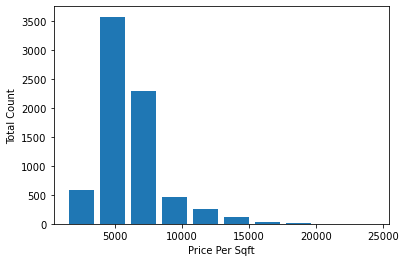

In [39]:
plt.hist(df3['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price Per Sqft')
plt.ylabel('Total Count')
plt.show()

In [40]:
# Remove Outliers in bath Column
df3['bath'].unique()

array([ 2,  3,  4,  5,  8,  1,  6,  7,  9, 12, 16, 13], dtype=int64)

<AxesSubplot:xlabel='bath', ylabel='Count'>

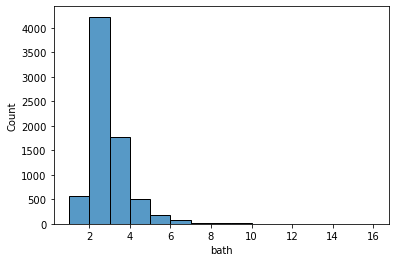

In [41]:
# histplot of bath
sns.histplot(df3['bath'],binwidth=1)

In [42]:
df4 = df3[~(df3['bath']>df3['BHK']+2)]

In [43]:
df4.shape

(7358, 6)

In [44]:
df5 = df4.drop('price_per_sqft',axis=1)

In [45]:
df5.head()

,location,total_sqft,bath,price,BHK
1,devarachikkanahalli,1250.0,2,40.0,2
2,devarachikkanahalli,1200.0,2,83.0,2
3,devarachikkanahalli,1170.0,2,40.0,2
4,devarachikkanahalli,1425.0,2,65.0,3
5,devarachikkanahalli,947.0,2,43.0,2


In [46]:
df6 = df5[~(df5['total_sqft']>10000)]
df6.shape

(7353, 5)

In [47]:
df6 = df6[~(df6['price']>1000)]
df6.shape

(7351, 5)

# Encoding of Location Column using Dummies

In [48]:
dummies = pd.get_dummies(df6['location'],drop_first=True)
dummies.shape

(7351, 240)

In [49]:
df7 = pd.concat([df6.drop('location',axis=1),dummies],axis=1)

In [50]:
df7.shape

(7351, 244)

In [51]:
df7.head()

,total_sqft,bath,price,BHK,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1250.0,2,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,83.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2,65.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2,43.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## analysis of bath and bhk columns

<AxesSubplot:xlabel='bath', ylabel='Density'>

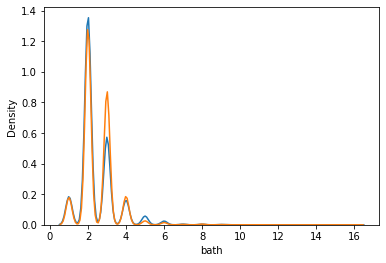

In [52]:
sns.kdeplot(df7['bath'])
sns.kdeplot(df7['BHK'])

# we can see here is very strong relationship between bath and bhk column.

<AxesSubplot:xlabel='total_sqft', ylabel='Count'>

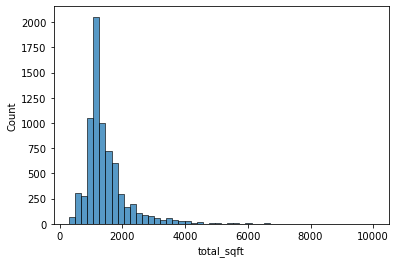

In [53]:
# Histpgram of square feet
sns.histplot(df7['total_sqft'],bins=50)



<AxesSubplot:xlabel='price', ylabel='Count'>

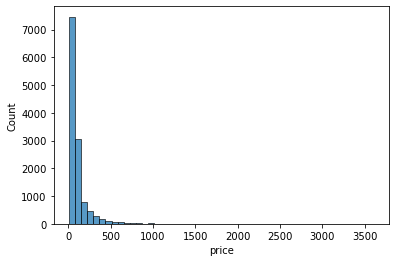

In [54]:
# Histogram of Price
sns.histplot(df['price'],bins=50)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

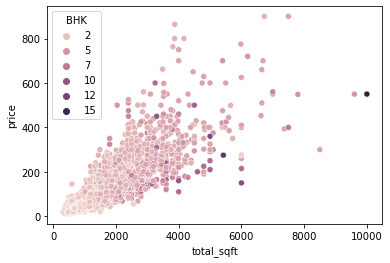

In [55]:
sns.scatterplot(data=df7,x='total_sqft',y='price',hue='BHK')

In [56]:
df7.head()

,total_sqft,bath,price,BHK,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1250.0,2,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,83.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2,40.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2,65.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2,43.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We got Our Final Clean Data set now are moving to Model Building

# Model Building

In [57]:
# Import Required Libraries
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [58]:
X = df7.drop('price',axis=1)
y = df7['price']

In [71]:
# Train test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [72]:
X_train.shape

(5880, 243)

In [81]:
# Train Model
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8655472954008561

In [82]:
from sklearn.model_selection import ShuffleSplit,cross_val_score,GridSearchCV

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
cross_val_score(lr,X,y,cv=cv).mean()

0.8562721920122544

In [70]:
def find_best_model_using_gridsearchvc(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model_name':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
#         print(pd.DataFrame(scores,columns=["Model","Best Score","Best Params"])
    return pd.DataFrame(scores)

find_best_model_using_gridsearchvc(X,y)

,model_name,best_score,best_params
0,linear_regression,0.855983,{'normalize': True}
1,lasso,0.744144,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.829004,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


We have checked all the algorithms score but among them only one algorithm is giving us very good result that is a Linear Regression. So, Now Let's Try to Increase the performance of Our Algorithm. 

In [118]:
# Method for Find Index of the Column
# for i in range(len(X.columns)):
#     if col[i-1] == 'yelenahalli':
#         print(i-1)

def predict_price(sqft,bath,bhk,location):
    loc_index = np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr.predict([x])

In [117]:
predict_price(1200,2,2,'vijayanagar')[0]

83.56644681029658

In [119]:
y_pred = lr.predict(X_test)

In [123]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.8655472954008561
17.51139872869785
30.02006863404025
